# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

<p class="reading-options">
  <a class="btn" href="/text-analysis/topic-models-with-gensim">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Topic models with Gensim.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Topic models with Gensim.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [1]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

--2021-06-25 15:08:32--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483086 (6.2M) [text/csv]
Saving to: ‘data/recipes.csv’

recipes.csv         100%[===================>]   6.18M  10.1MB/s    in 0.6s    

2021-06-25 15:08:33 (10.1 MB/s) - ‘data/recipes.csv’ saved [6483086/6483086]

--2021-06-25 15:08:33--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10501219 (10M) [text/csv]
Saving to: ‘data/state-of-the-union

## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Our data

We'll be using the same dataset as we did [with scikit-learn](/text-analysis/introduction-to-topic-modeling/#Attempt-two:-State-of-the-Union-addresses): State of the Union addresses from 1790 to 2012, where America's president addresses the Congress about the coming year.

In [2]:
import pandas as pd

df = pd.read_csv("data/state-of-the-union.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


## Using Gensim

In [3]:
#!pip install --upgrade gensim

In [4]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [5]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [6]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [7]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [8]:
lsi_model.print_topics()

[(0,
  '0.084*"tonight" + 0.073*"program" + 0.066*"ve" + 0.065*"help" + 0.065*"budget" + 0.065*"mexico" + 0.065*"americans" + 0.061*"programs" + 0.059*"jobs" + 0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.123*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '-0.199*"tonight" + -0.177*"ve" + -0.163*"re" + 0.137*"program" + -0.094*"jobs" + -0.092*"ll" + 0.092*"farm" + -0.091*"iraq" + 0.087*"veterans" + 0.081*"industrial"'),
 (3,
  '-0.142*"program" + 0.120*"silver" + 0.114*"re" + 0.110*"cent" + -0.105*"communist" + 0.105*"ve" + 0.099*"tonight" + -0.098*"soviet" + -0.095*"programs" + 0.089*"gold"'),
 (4,
  '0.200*"iraq" + 0.172*"terrorists" + -0.141*"silver" + -0.131*"gold" + 0.123*"interstate" + 0.118*"iraqi" + 0.111*"al" + -0.108*"programs" + -0.100*"notes" + -0.098*"mexico"'),
 (5,
  '0.271*"iraq" + 0.238*"terrorists" + -0.184*"re" + -0.183*"ve" + 0.167*"iraqi" + 0.152*"al" + 0.1

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [9]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.083990,tonight,0
1,0.073465,program,0
2,0.065712,ve,0
3,0.065219,help,0
4,0.065029,budget,0


Then we'll use seaborn to visualize it.

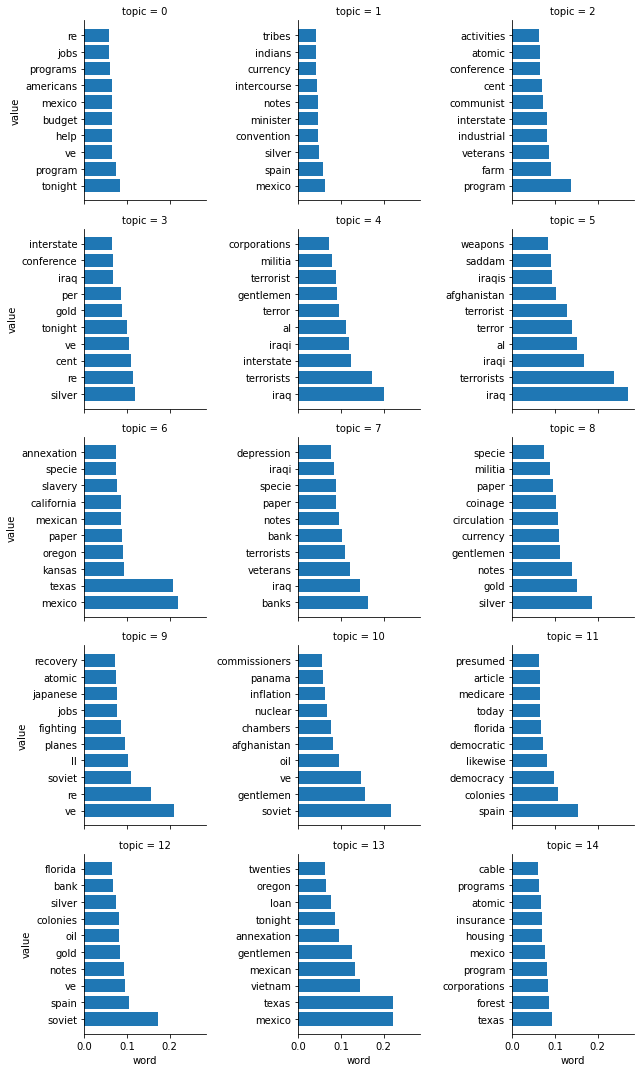

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## Using LDA with Gensim

Now we'll use LDA.

In [12]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [13]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [14]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [15]:
lda_model.print_topics()

[(0,
  '0.003*"1930" + 0.003*"1559" + 0.003*"151" + 0.003*"1260" + 0.002*"976" + 0.002*"951" + 0.002*"1986" + 0.002*"613" + 0.002*"1446" + 0.002*"1626"'),
 (1,
  '0.003*"976" + 0.003*"1986" + 0.003*"1559" + 0.003*"1930" + 0.003*"1989" + 0.003*"1971" + 0.002*"1260" + 0.002*"1242" + 0.002*"151" + 0.002*"57"'),
 (2,
  '0.004*"1260" + 0.004*"1930" + 0.003*"1971" + 0.002*"440" + 0.002*"1651" + 0.002*"1995" + 0.002*"1896" + 0.002*"1802" + 0.002*"1644" + 0.002*"1242"'),
 (3,
  '0.003*"1930" + 0.003*"1559" + 0.003*"1986" + 0.002*"1974" + 0.002*"1971" + 0.002*"1260" + 0.002*"1626" + 0.002*"1446" + 0.002*"1242" + 0.002*"1999"'),
 (4,
  '0.004*"1930" + 0.004*"1260" + 0.003*"1559" + 0.003*"1986" + 0.003*"1989" + 0.002*"1974" + 0.002*"1784" + 0.002*"1626" + 0.002*"1802" + 0.002*"1865"'),
 (5,
  '0.006*"1986" + 0.004*"1559" + 0.003*"1242" + 0.003*"1260" + 0.003*"1930" + 0.002*"1626" + 0.002*"1017" + 0.002*"1481" + 0.002*"1964" + 0.002*"151"'),
 (6,
  '0.005*"1559" + 0.003*"151" + 0.002*"1971" + 0.00

In [22]:
!pip install pyldavis==3.3.1

In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.011257 -0.000274       1        1  25.077761
0      0.005528  0.003463       2        1  11.762915
13    -0.006564  0.003276       3        1   9.726324
14    -0.002139 -0.005662       4        1   7.386922
5     -0.002310 -0.004095       5        1   7.283257
2     -0.005883  0.004782       6        1   6.571732
10    -0.003478 -0.000188       7        1   6.292075
6      0.002782  0.001645       8        1   5.722980
9      0.000404 -0.000529       9        1   5.059584
8      0.003364  0.001203      10        1   3.932674
1     -0.000623 -0.000857      11        1   2.969472
3      0.000739 -0.000595      12        1   2.951113
4     -0.003717 -0.000831      13        1   2.343924
7      0.001165 -0.000557      14        1   1.807181
11    -0.000526 -0.000782      15        1   1.112085, topic_info=           Term        Freq       Total Category  logprob  loglift
1986    program  676.000000  676.000000  Default  30.0000  30.0000
1930       help  701.000000  701.000000  Default  29.0000  29.0000
1260  americans  712.000000  712.000000  Default  28.0000  28.0000
1559     mexico  907.000000  907.000000  Default  27.0000  27.0000
1971     budget  518.000000  518.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
578   estimated    4.667560  415.065445  Topic15  -6.4334   0.0111
57      indians    4.367995  388.109073  Topic15  -6.4997   0.0120
1545     cannot    4.384158  408.869170  Topic15  -6.4960  -0.0365
973       ships    4.299654  387.932152  Topic15  -6.5155  -0.0034
440       court    4.412486  493.095067  Topic15  -6.4896  -0.2173

[1035 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1523      1  0.297216  absence
1523      2  0.148608  absence
1523      3  0.074304  absence
1523      4  0.061920  absence
1523      5  0.049536  absence
...     ...       ...      ...
253      11  0.030896     zeal
253      12  0.030896     zeal
253      13  0.030896     zeal
253      14  0.015448     zeal
253      15  0.015448     zeal

[7871 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 14, 15, 6, 3, 11, 7, 10, 9, 2, 4, 5, 8, 12])